# Applied Artificial Intelligence - Lab 4

Luca van Straaten - 18073611

**System information**: 2018 Intel Core i7 13-inch MacBookPro15,2, 16GB RAM, 512GB SSD, macOS Ventura 13.0 (22A380), kernel 22.1.0

This file, along with the rest of the labs, are tracked in a git repository on github. [lab 4](https://github.com/lucanatorvs/Applied_Artificial_Intelligence_Lab/blob/main/4/lab4.ipynb)

The goal of this assignment is to build and train a Neural Network that can recognize handwritten digits from 0 to 9. You can use the following code to download the MINIST data of handwritten digits.

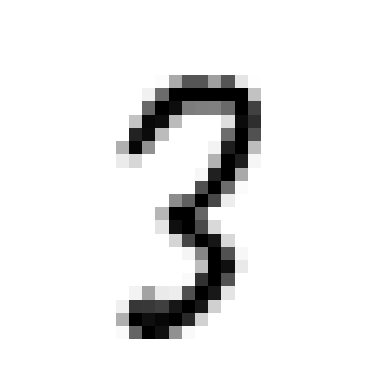

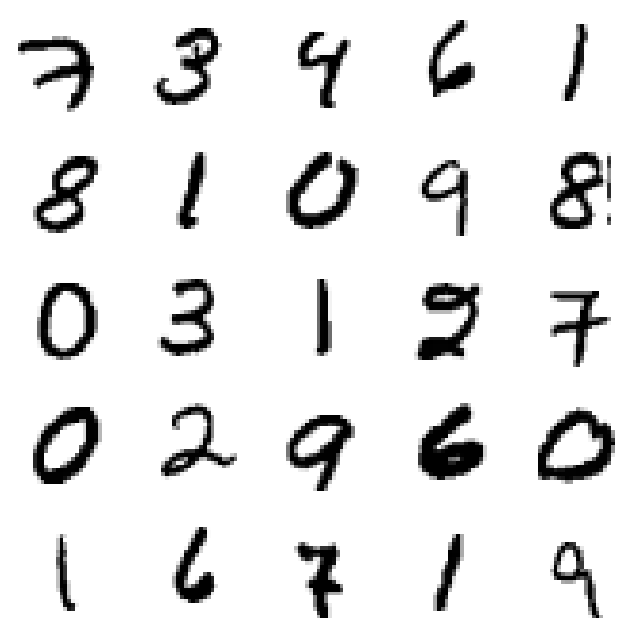

In [74]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import random

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train_full.shape

# test a random image
def plot_digit(image):
    plt.imshow(image, cmap = mpl.cm.binary, interpolation="nearest")
    plt.axis("off")

some_image = random.randint(0, X_train_full.shape[0])
some_digit = X_train_full[some_image,:,:]
plot_digit(some_digit)

# rescaling and separating a validation set
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] /255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# plot the first 25 images
plt.figure(figsize=(8,8))
for index, image in enumerate(X_train[:25]):
    plt.subplot(5,5,index+1)
    plt.imshow(image, cmap = mpl.cm.binary)
    plt.axis("off")

*You need to perform the following steps:*

## 1.

Train a neural network model using only one inner dense layer of 10 units . Choose the correct input and output layers. Investigate the model using learning rates of 0.01 and 0.1 and a ReLU activation function. Train your model for 100 epochs and plot learning curves for the training and validation set for each combination of above parameters. You can refer to chapter 10 for help.


In [75]:
def Train_neural_network(layers, learning_rate, epochs, X_train, y_train, X_valid, y_valid):
    # layes is a 2d array with the number of neurons in each layer and the activation function
    # learning_rate is the learning rate
    # epochs is the number of epochs
    # X_train is the training set
    # y_train is the training labels
    # X_valid is the validation set
    # y_valid is the validation labels

    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    for layer in layers:
        model.add(keras.layers.Dense(layer[0], activation=layer[1]))
    model.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=learning_rate),
                metrics=["accuracy"])
    history = model.fit(X_train, y_train, epochs=epochs,
                    validation_data=(X_valid, y_valid))

    # print the modle summery
    model.summary()
    
    return history, model

In [76]:
# make a dictionary of the history and a dictionary of the models
historys = {}
models = {}

In [77]:
epochs = 60

# one inner dense layer of 10 units learning rate of 0.01 and 100 epochs
layers = [[10, "softmax"]]
learning_rate = 0.01
# train the model and append the history and model to the arrays
history, model = Train_neural_network(layers, learning_rate, epochs, X_train, y_train, X_valid, y_valid)
# add the history and model to the dictionaries
historys["one inner dense layer of 10 units learning rate of 0.01 and 100 epochs"] = history
models["one inner dense layer of 10 units learning rate of 0.01 and 100 epochs"] = model

# one inner dense layer of 10 units learning rate of 0.1 and 100 epochs
layers = [[10, "softmax"]]
learning_rate = 0.1
# train the model and append the history and model to the arrays
history, model = Train_neural_network(layers, learning_rate, epochs, X_train, y_train, X_valid, y_valid)
# add the history and model to the dictionaries
historys["one inner dense layer of 10 units learning rate of 0.1 and 100 epochs"] = history
models["one inner dense layer of 10 units learning rate of 0.1 and 100 epochs"] = model

# one inner dense layer of 10 units with ReLU and a output layer of 10 units with softmax, learning rate of 0.01 and 100 epochs
layers = [[10, "relu"],[10, "softmax"]]
learning_rate = 0.01
# train the model and append the history and model to the arrays
history, model = Train_neural_network(layers, learning_rate, epochs, X_train, y_train, X_valid, y_valid)
# add the history and model to the dictionaries
historys["one inner dense layer of 10 units with ReLU and a output layer of 10 units with softmax, learning rate of 0.01 and 100 epochs"] = history
models["one inner dense layer of 10 units with ReLU and a output layer of 10 units with softmax, learning rate of 0.01 and 100 epochs"] = model

# one inner dense layer of 10 units with ReLU and a output layer of 10 units with softmax, learning rate of 0.1 and 100 epochs
layers = [[10, "relu"],[10, "softmax"]]
learning_rate = 0.1
# train the model and append the history and model to the arrays
history, model = Train_neural_network(layers, learning_rate, epochs, X_train, y_train, X_valid, y_valid)
# add the history and model to the dictionaries
historys["one inner dense layer of 10 units with ReLU and a output layer of 10 units with softmax, learning rate of 0.1 and 100 epochs"] = history
models["one inner dense layer of 10 units with ReLU and a output layer of 10 units with softmax, learning rate of 0.1 and 100 epochs"] = model

Epoch 1/60
1719/1719 [==============================] - 2s 963us/step - loss: 0.7992 - accuracy: 0.8130 - val_loss: 0.4986 - val_accuracy: 0.8766
Epoch 2/60
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4676 - accuracy: 0.8788 - val_loss: 0.4108 - val_accuracy: 0.8912
Epoch 3/60
1719/1719 [==============================] - 2s 946us/step - loss: 0.4120 - accuracy: 0.8898 - val_loss: 0.3752 - val_accuracy: 0.8992
Epoch 4/60
1719/1719 [==============================] - 2s 904us/step - loss: 0.3843 - accuracy: 0.8956 - val_loss: 0.3538 - val_accuracy: 0.9026
Epoch 5/60
1719/1719 [==============================] - 2s 901us/step - loss: 0.3668 - accuracy: 0.8995 - val_loss: 0.3392 - val_accuracy: 0.9068
Epoch 6/60
1719/1719 [==============================] - 2s 913us/step - loss: 0.3543 - accuracy: 0.9020 - val_loss: 0.3292 - val_accuracy: 0.9082
Epoch 7/60
1719/1719 [==============================] - 2s 983us/step - loss: 0.3450 - accuracy: 0.9042 - val_loss: 0.3212 - v

one inner dense layer of 10 units learning rate of 0.01 and 100 epochs


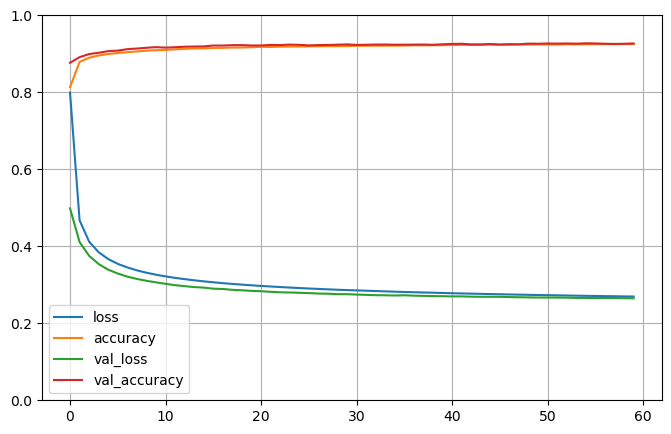

one inner dense layer of 10 units learning rate of 0.1 and 100 epochs


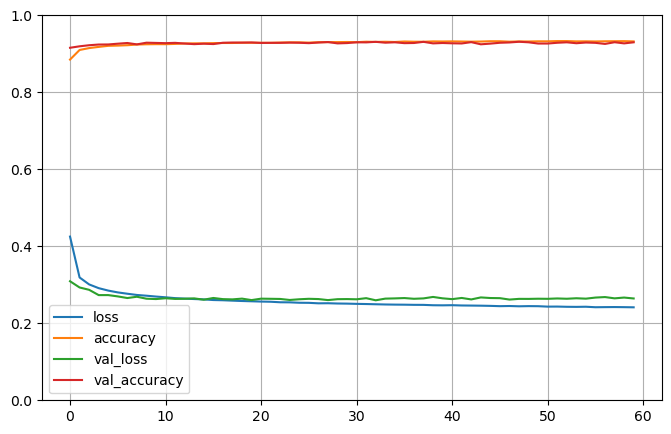

one inner dense layer of 10 units with ReLU and a output layer of 10 units with softmax, learning rate of 0.01 and 100 epochs


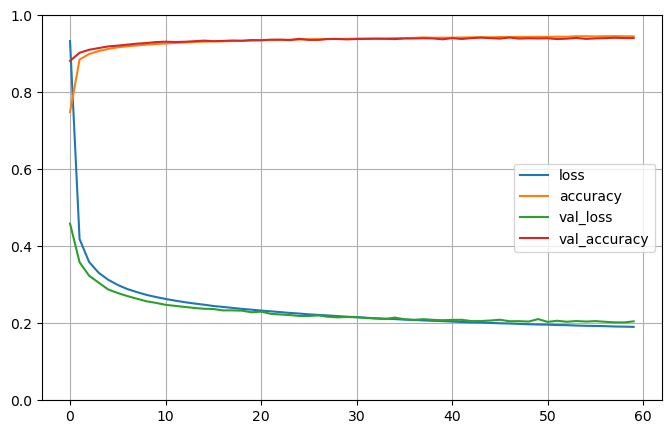

one inner dense layer of 10 units with ReLU and a output layer of 10 units with softmax, learning rate of 0.1 and 100 epochs


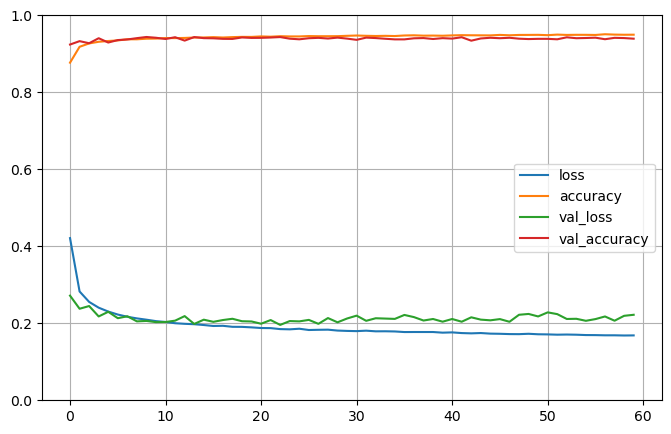

In [78]:
# plot the accuracy and loss for each model
for key in historys:
    # print the key
    print(key)
    pd.DataFrame(historys[key].history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()


**Question 1**: From each learning curve draw your conclusions about the performance of your model based on the above parameters? Is your model overfitting or underfitting?

**Answer 1**: The model is not overfitting. The validation loss is decreasing and the validation accuracy is increasing. The training loss is also decreasing and the training accuracy is increasing.


## 2

Repeat the step 1 for the following cases:

- **a**. one inner dense layer of 50 units
- **b**. one inner dense layer of 100 units
- **c**. two dense layers of 10 and 10 units
- **d**. two dense layers of 50 and 50 units
- **e**. two dense layers of 100 and 50 units
- **f**. two dense layers of 100 and 100 units

From each learning curve draw your conclusions about the performance of your model based on the above parameters? Is your model overfitting or underfitting? Is there anything else you can suggest to change which could have a positive effect on the performance of the above model?


In [79]:
epochs = 60 # should be 60

# a for loop to train the models for a learning_rate of 0.01 and 0.1
for learning_rate in [0.01, 0.1]:
    print ("A, one inner dense layer of 50 units")
    layers = [[50, "relu"], [10, "softmax"]]
    # train the model and append the history and model to the dictionaries
    history, model = Train_neural_network(layers, learning_rate, epochs, X_train, y_train, X_valid, y_valid)
    historys["one inner dense layer of 50 units and lr=" + str(learning_rate)] = history
    models["one inner dense layer of 50 units and lr=" + str(learning_rate)] = model

    print ("B, one inner dense layer of 100 units")
    layers = [[100, "relu"], [10, "softmax"]]
    # train the model and append the history and model to the dictionaries
    history, model = Train_neural_network(layers, learning_rate, epochs, X_train, y_train, X_valid, y_valid)
    historys["one inner dense layer of 100 units and lr=" + str(learning_rate)] = history
    models["one inner dense layer of 100 units and lr=" + str(learning_rate)] = model

    print ("C, two dense layers of 10 and 10 units")
    layers = [[10, "relu"], [10, "softmax"]]
    # train the model and append the history and model to the dictionaries
    history, model = Train_neural_network(layers, learning_rate, epochs, X_train, y_train, X_valid, y_valid)
    historys["two dense layers of 10 and 10 units and lr=" + str(learning_rate)] = history
    models["two dense layers of 10 and 10 units and lr=" + str(learning_rate)] = model
    
    print ("D, two dense layers of 50 and 50 units")
    layers = [[50, "relu"], [50, "relu"], [10, "softmax"]]
    # train the model and append the history and model to the dictionaries
    history, model = Train_neural_network(layers, learning_rate, epochs, X_train, y_train, X_valid, y_valid)
    historys["two dense layers of 50 and 50 units and lr=" + str(learning_rate)] = history
    models["two dense layers of 50 and 50 units and lr=" + str(learning_rate)] = model
    
    print ("E, two dense layers of 100 and 50 units")
    layers = [[100, "relu"], [50, "relu"], [10, "softmax"]]
    # train the model and append the history and model to the dictionaries
    history, model = Train_neural_network(layers, learning_rate, epochs, X_train, y_train, X_valid, y_valid)
    historys["two dense layers of 100 and 50 units and lr=" + str(learning_rate)] = history
    models["two dense layers of 100 and 50 units and lr=" + str(learning_rate)] = model

    print ("F, two dense layers of 100 and 100 units")
    layers = [[100, "relu"], [100, "relu"], [10, "softmax"]]
    # train the model and append the history and model to the dictionaries
    history, model = Train_neural_network(layers, learning_rate, epochs, X_train, y_train, X_valid, y_valid)
    historys["two dense layers of 100 and 100 units and lr=" + str(learning_rate)] = history
    models["two dense layers of 100 and 100 units and lr=" + str(learning_rate)] = model

A, one inner dense layer of 50 units
Epoch 1/60
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7027 - accuracy: 0.8223 - val_loss: 0.3730 - val_accuracy: 0.9020
Epoch 2/60
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3580 - accuracy: 0.9001 - val_loss: 0.3051 - val_accuracy: 0.9160
Epoch 3/60
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3119 - accuracy: 0.9123 - val_loss: 0.2749 - val_accuracy: 0.9252
Epoch 4/60
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2849 - accuracy: 0.9195 - val_loss: 0.2541 - val_accuracy: 0.9306
Epoch 5/60
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2646 - accuracy: 0.9254 - val_loss: 0.2388 - val_accuracy: 0.9364
Epoch 6/60
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2478 - accuracy: 0.9301 - val_loss: 0.2270 - val_accuracy: 0.9404
Epoch 7/60
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2330 - accuracy: 0.93

A one inner dense layer of 10 units learning rate of 0.01 and 100 epochs
B one inner dense layer of 10 units learning rate of 0.1 and 100 epochs
C one inner dense layer of 10 units with ReLU and a output layer of 10 units with softmax, learning rate of 0.01 and 100 epochs
D one inner dense layer of 10 units with ReLU and a output layer of 10 units with softmax, learning rate of 0.1 and 100 epochs
E one inner dense layer of 50 units and lr=0.01
F one inner dense layer of 100 units and lr=0.01
G two dense layers of 10 and 10 units and lr=0.01
H two dense layers of 50 and 50 units and lr=0.01
I two dense layers of 100 and 50 units and lr=0.01
J two dense layers of 100 and 100 units and lr=0.01
K one inner dense layer of 50 units and lr=0.1
L one inner dense layer of 100 units and lr=0.1
M two dense layers of 10 and 10 units and lr=0.1
N two dense layers of 50 and 50 units and lr=0.1
O two dense layers of 100 and 50 units and lr=0.1
P two dense layers of 100 and 100 units and lr=0.1


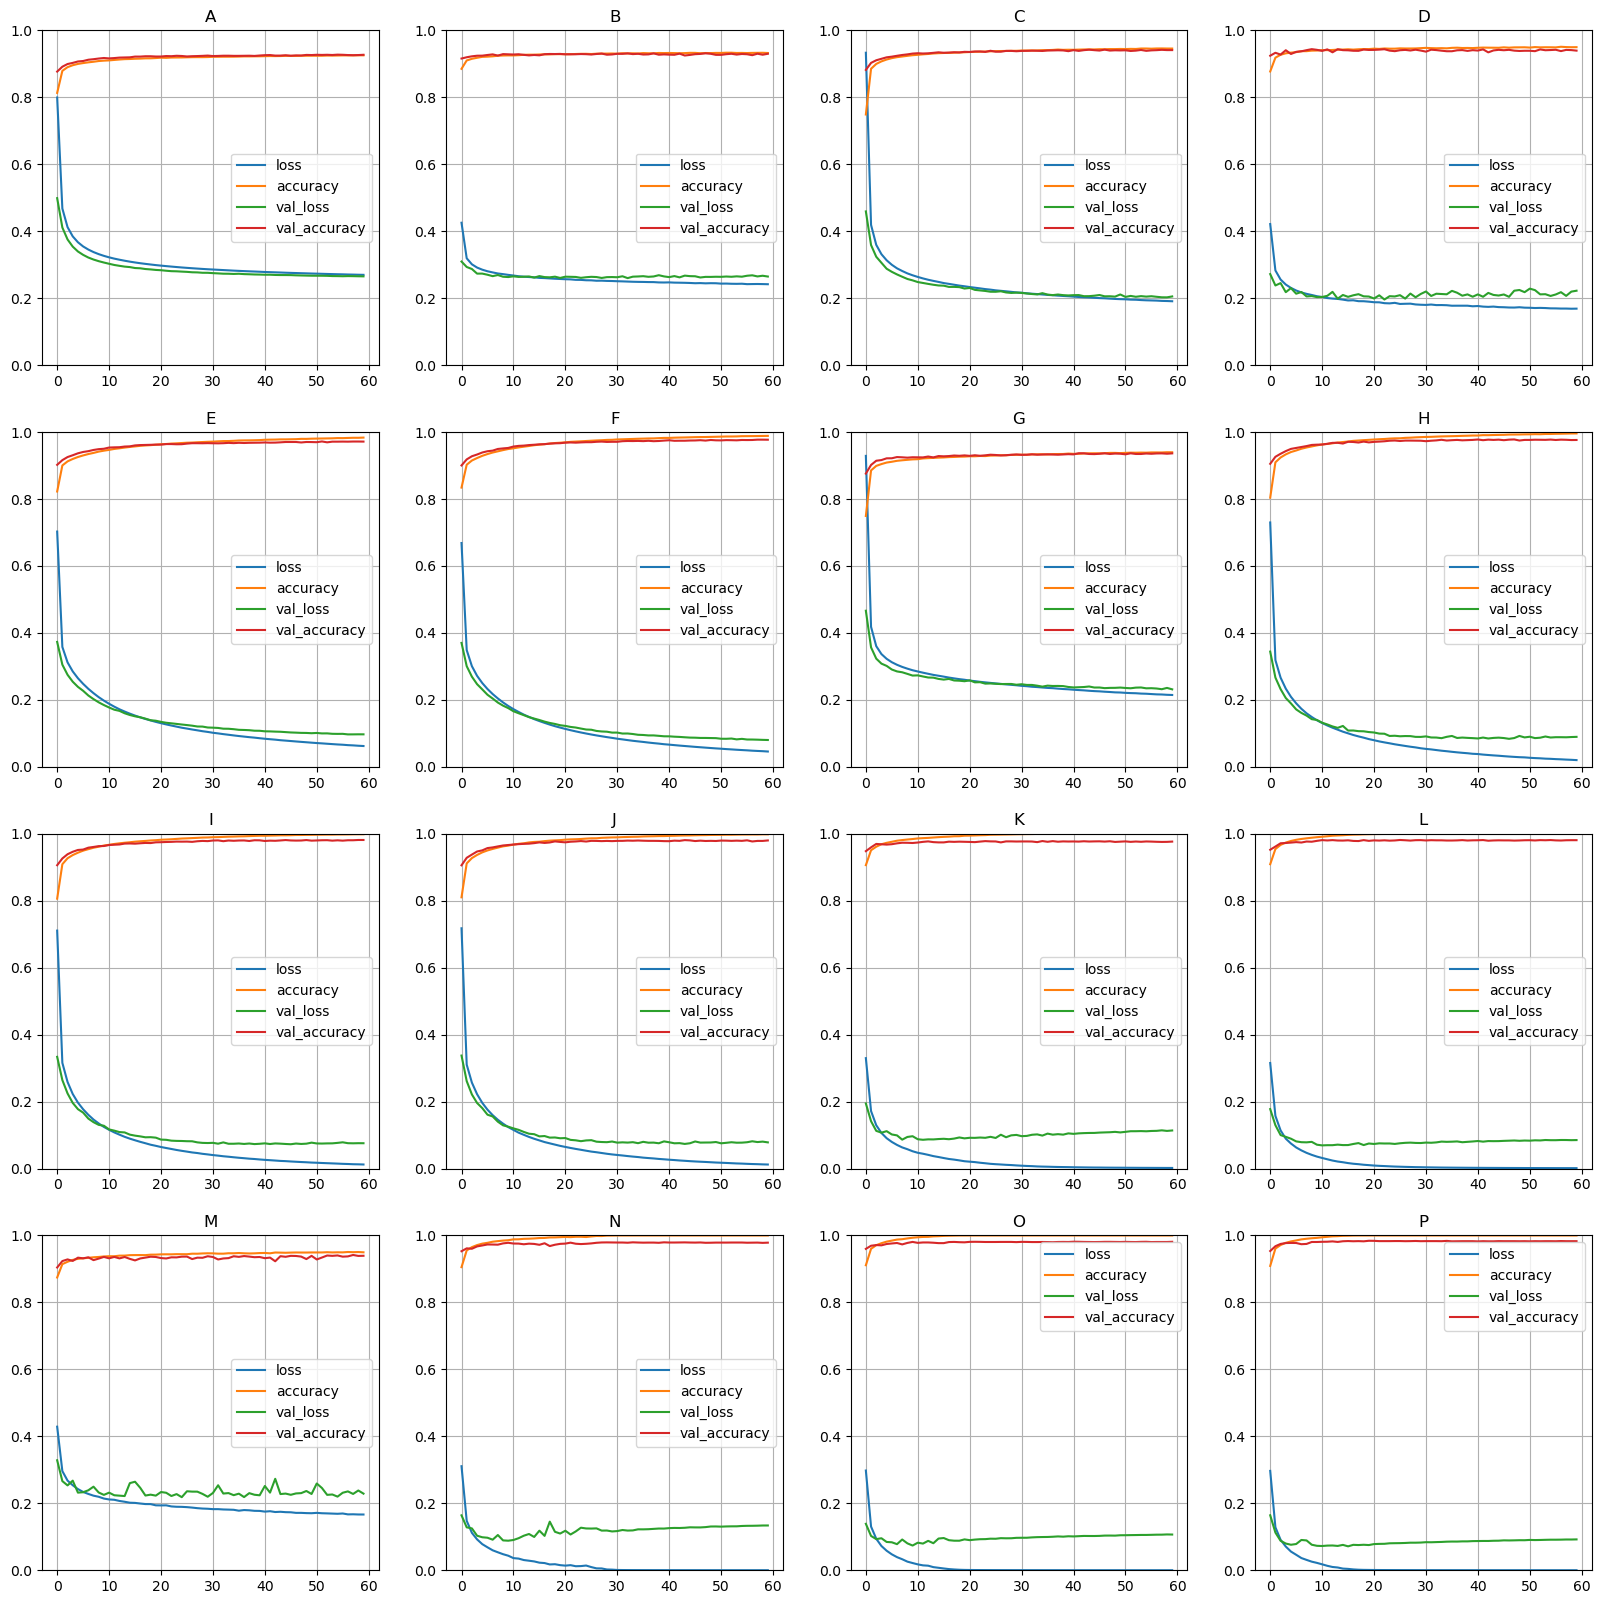

In [80]:
# print the keys with the corosponding letter
for i, key in enumerate(historys):
    print(chr(65 + i), key)

# plot each model history in a grid with the key as the title, calculate the size of the grid and print the key (the key is a long string, so it needs to wrap)
grid_size = int(np.ceil(np.sqrt(len(historys))))
fig, axs = plt.subplots(grid_size, grid_size, figsize=(20, 20))
for i, key in enumerate(historys):
    ax = axs[i // grid_size, i % grid_size]
    pd.DataFrame(historys[key].history).plot(ax=ax)
    # set the tytel as a letter and print the key with the corosponding letter below the plot
    ax.set_title(chr(65 + i))
    ax.grid(True)
    ax.set_ylim(0, 1)

### model E (one inner dense layer of 50 units and lr=0.01)

**Awnser**: This model is starting to overfit. The (validation) loss is still decreasing, but if we look at model K we can see validation loss will start to increase. So this model is starting to overfit.

### model F (one inner dense layer of 100 units and lr=0.01)

**Awnser**: This is very similar to model E. The validation loss is still decreasing, but if we look at model L we can see validation loss will start to increase. So this model is starting to overfit. But the loss is going down faster than model E.

### model G (two dense layers of 10 and 10 units and lr=0.01)

**Awnser**: The same as the previous models. But the loss is higher than the previous models. And the accuracy is lower.

### model H (two dense layers of 50 and 50 units and lr=0.01)

**Awnser**: Compared to the previous models, the loss is lower and the accuracy is higher. But the model is still starting to overfit.

### model I (two dense layers of 100 and 50 units and lr=0.01)

**Awnser**: The loss is the lowest yet, but the gap between the training and validation loss is the highest yet. The accuracy is the highest yet. So this model is overfitting.

### model J (two dense layers of 100 and 100 units and lr=0.01)

**Awnser**: Very similar to model I, so adding more numbers to the second dense layers does not improve the model significantly.

### model K (one inner dense layer of 50 units and lr=0.1)

**Awnser**: Compaired to model E, the loss is lower and the accuracy is higher. But the model is overfit more than model E. And the graph is not as smooth as model E.

### model L (one inner dense layer of 100 units and lr=0.1)

**Awnser**: Compaired to model F, the loss is lower and the accuracy is higher. But the model is overfit more than model F. And the graph is not as smooth as model F.

### model M (two dense layers of 10 and 10 units and lr=0.1)

**Awnser**: Compaired to model G, the loss is lower and the accuracy is higher. But the model is overfit more than model G. And the graph is not as smooth as model G.

### model N (two dense layers of 50 and 50 units and lr=0.1)

**Awnser**: Compaired to model H, the loss is lower and the accuracy is higher. But the model is overfit more than model H. And the graph is not as smooth as model H.

### model O (two dense layers of 100 and 50 units and lr=0.1)

**Awnser**: Compaired to model I, the loss is lower and the accuracy is higher. But the model is overfit more than model I. And the graph is not as smooth as model I.

### model P (two dense layers of 100 and 100 units and lr=0.1)

**Awnser**: Compaired to model J, the loss is lower and the accuracy is higher. But the model is overfit more than model J. And the graph is not as smooth as model J.

## 3

Draw an overall conclusion from the above steps. Which model and parameters you think are the best choice to recognize handwritten digits? Explain with reasoning. 

**Answer 3a**: I think model H or I are the best choice. They have the lowest loss and the highest accuracy. And they are not overfitting much yet. but you can get about ths same result by training model O or P to 20 epochs instead of 60 epochs.

here I test model N with the test data, and it gets 97.4% accuracy, which might be pretty good.

In [83]:
key = "two dense layers of 50 and 50 units and lr=0.1"

# evaluate the model on the test set
# print the accuracy, precision, recall and f1 score and RMSE
import sklearn.metrics as metrics
y_pred = models[key].predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='macro'))
print("F1 score:",metrics.f1_score(y_test, y_pred, average='macro'))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

313/313 [==============================] - 0s 1ms/step
Accuracy: 0.9743
Precision: 0.9746091547173584
Recall: 0.9738102936216254
F1 score: 0.9741039734271238
RMSE: 0.6825686778632608


1/1 [==============================] - 0s 24ms/step


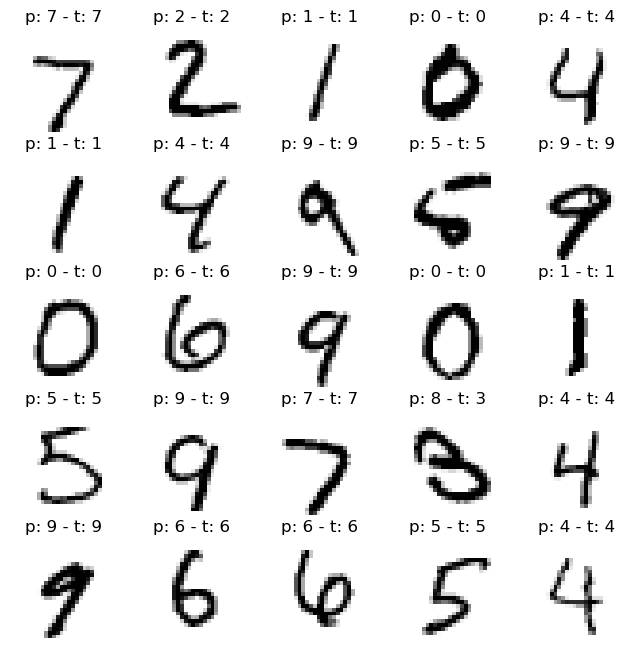

In [84]:
X_new = X_test[:25]
y_proba = models[key].predict(X_new)
y_pred = np.argmax(y_proba, axis=-1)

plt.figure(figsize=(8,8))
for index, image in enumerate(X_new):
    plt.subplot(5,5,index+1)
    plt.imshow(image, cmap = mpl.cm.binary)
    plt.axis("off")
    plt.title("p: " + str(y_pred[index]) + " - t: " + str(y_test[index]))

plt.show()
